In [1]:
# Load Required Python Libraries for Data Processing, Visualization, and Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # To download historical stock data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import datetime

In [2]:
# Set Configuration Parameters for Stock Prediction
STOCK_TICKER = 'INFY.NS'
START_DATE = '2015-01-01'
END_DATE = datetime.datetime.now().strftime('%Y-%m-%d')
PREDICTION_DAYS = 60
FUTURE_PRED_DAYS = 30

print(f"--- Stock Price Prediction Project for {STOCK_TICKER} ---")
print(f"Data from {START_DATE} to {END_DATE}\n")


--- Stock Price Prediction Project for INFY.NS ---
Data from 2015-01-01 to 2025-07-27



In [3]:
# Data Acquisition
print("Data Acquisition")
try:
    # Download historical stock data for Infosys from Yahoo Finance
    df = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)
    if df.empty:
        raise ValueError("No data downloaded. Check ticker or date range.")
    print(f"Successfully downloaded {len(df)} rows of data.\n")
    print("Initial Data Head:")
    print(df.head())
    print("\nData Info:")
    df.info()
    print("\n")
except Exception as e:
    print(f"Error downloading data: {e}")
    exit()

Data Acquisition


/tmp/ipython-input-3-2313929994.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Successfully downloaded 2609 rows of data.

Initial Data Head:
Price            Close        High         Low        Open   Volume
Ticker         INFY.NS     INFY.NS     INFY.NS     INFY.NS  INFY.NS
Date                                                               
2015-01-01  380.634552  382.099713  377.260816  379.583860  2002764
2015-01-02  388.114563  389.242374  380.171834  380.171834  6778320
2015-01-05  384.779358  391.353318  381.232111  387.478346  9937024
2015-01-06  376.740234  382.678019  372.865263  381.714094  9667316
2015-01-07  378.542755  380.701936  375.930511  378.822284  7249916

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2015-01-01 to 2025-07-25
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, INFY.NS)   2609 non-null   float64
 1   (High, INFY.NS)    2609 non-null   float64
 2   (Low, INFY.NS)     2609 non-null   float64
 3   (Open, INFY.

In [5]:
# Data Preprocessing & Feature Engineering
print ("Data Preprocessing & Feature Engineering")

# Retain only the 'Close' price for simplified modeling
data = df[['Close']].copy()

# Create lagged feature for previous day's closing price
data['Prev_Close'] = data['Close'].shift(1)

# Add simple moving averages as additional features
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Drop rows with NaN values resulting from shifting and rolling
data.dropna(inplace=True)
print(f"\nData after feature engineering and NaN removal ({len(data)} rows):")
print(data.head())
print("\n")

# Define features and target for linear regression
X_lr = data[['Prev_Close', 'SMA_10', 'SMA_30']]
y_lr = data['Close']

# Chronological split for train-test sets (80/20)
train_size_lr = int(len(X_lr) * 0.8)
X_train_lr, X_test_lr = X_lr[:train_size_lr], X_lr[train_size_lr:]
y_train_lr, y_test_lr = y_lr[:train_size_lr], y_lr[train_size_lr:]

print(f"Linear Regression Training data size: {len(X_train_lr)}")
print(f"Linear Regression Testing data size: {len(X_test_lr)}\n")

Data Preprocessing & Feature Engineering

Data after feature engineering and NaN removal (2580 rows):
Price            Close  Prev_Close      SMA_10      SMA_30
Ticker         INFY.NS                                    
Date                                                      
2015-02-12  445.564362  440.484558  425.862793  410.374136
2015-02-13  442.653473  445.564362  428.835547  412.441434
2015-02-16  439.308655  442.653473  431.571167  414.147903
2015-02-18  442.730499  439.308655  434.956476  416.079608
2015-02-19  448.166992  442.730499  438.462265  418.460500


Linear Regression Training data size: 2064
Linear Regression Testing data size: 516



Exploratory Data Analysis (EDA) & Visualization


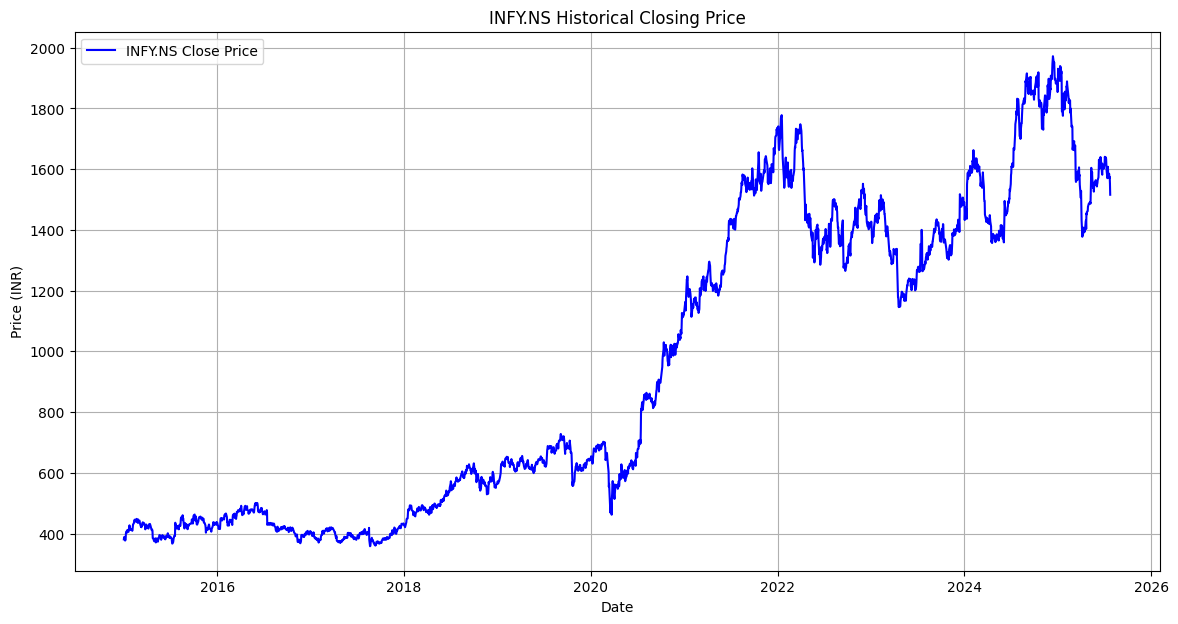

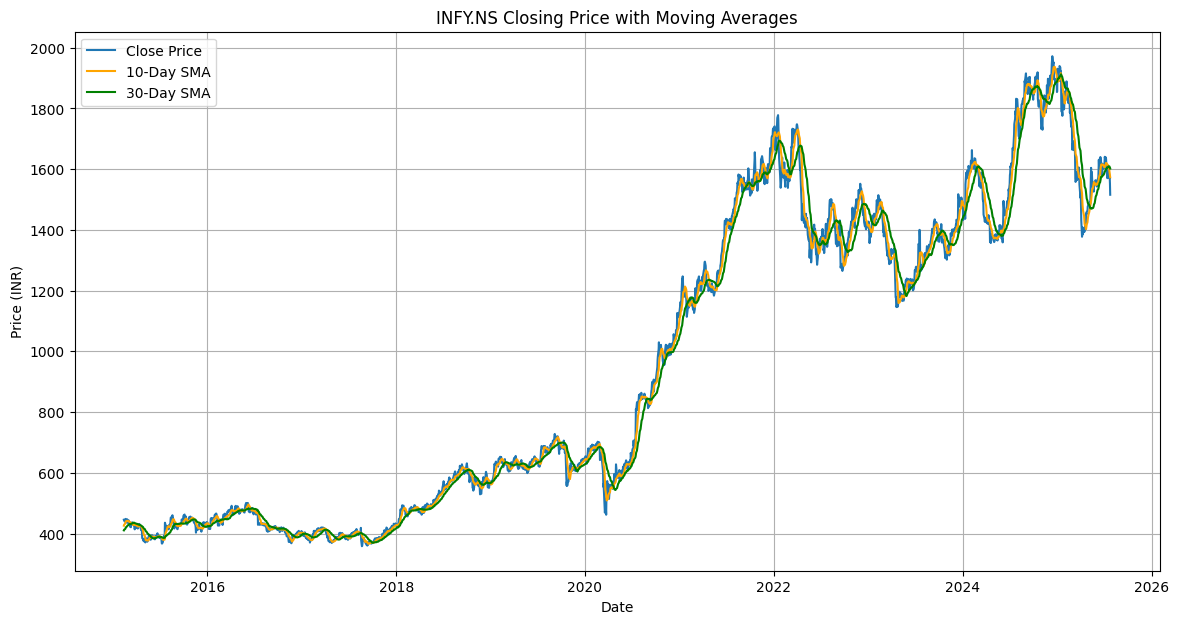

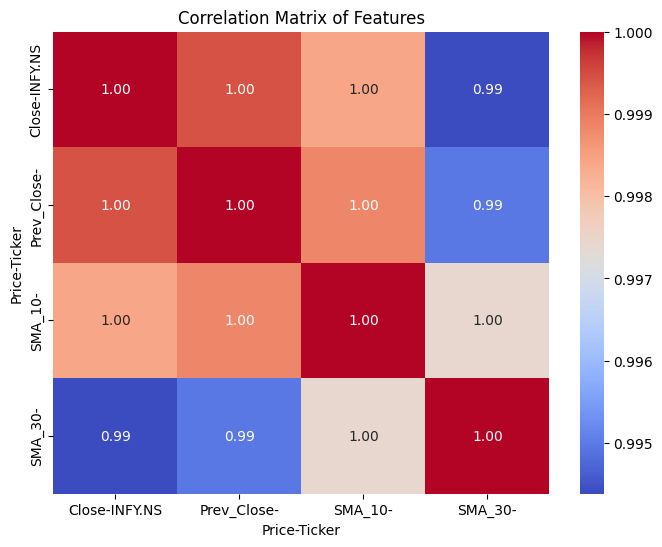

In [6]:
#  Exploratory Data Analysis (EDA) & Visualization
print("Exploratory Data Analysis (EDA) & Visualization")

# Plot historical closing prices for Infosys
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='INFY.NS Close Price', color='blue')
plt.title(f'{STOCK_TICKER} Historical Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Plot closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_10'], label='10-Day SMA', color='orange')
plt.plot(data['SMA_30'], label='30-Day SMA', color='green')
plt.title(f'{STOCK_TICKER} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Correlation heatmap between features
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()
print("\n")


In [7]:
# Model Building and Training (Linear Regression)
print("Model Building and Training (Linear Regression)")

linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)
lr_predictions = linear_model.predict(X_test_lr)

Model Building and Training (Linear Regression)


Model Evaluation (Linear Regression)
Linear Regression Metrics:
  Mean Squared Error (MSE): 570.37
  Root Mean Squared Error (RMSE): 23.88
  Mean Absolute Error (MAE): 16.77
  R-squared (R²): 0.99



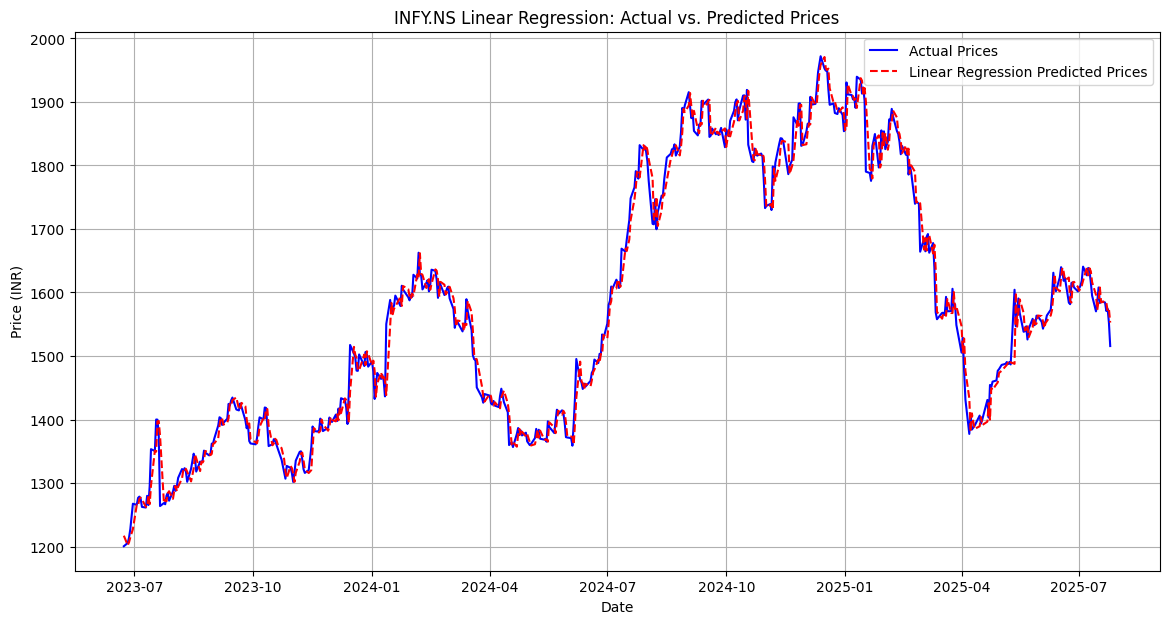

In [8]:
# Model Evaluation (Linear Regression)
print("Model Evaluation (Linear Regression)")

lr_mse = mean_squared_error(y_test_lr, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test_lr, lr_predictions)
lr_r2 = r2_score(y_test_lr, lr_predictions)

print(f"Linear Regression Metrics:")
print(f"  Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {lr_rmse:.2f}")
print(f"  Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"  R-squared (R²): {lr_r2:.2f}\n")

# Plot actual vs. predicted prices using Linear Regression
plt.figure(figsize=(14, 7))
plt.plot(y_test_lr.index, y_test_lr, label='Actual Prices', color='blue')
plt.plot(y_test_lr.index, lr_predictions, label='Linear Regression Predicted Prices', color='red', linestyle='--')
plt.title(f'{STOCK_TICKER} Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Model Building and Training (LSTM - Deep Learning)
print("Model Building and Training (LSTM - Deep Learning)")

# Extract 'Close' prices for LSTM modeling
lstm_data = df[['Close']].values

# Normalize data to range [0, 1] for better LSTM convergence
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data)

# Prepare data for LSTM where X is past 60 days, y is the next day
X_lstm = []
y_lstm = []

for i in range(PREDICTION_DAYS, len(scaled_data)):
    X_lstm.append(scaled_data[i-PREDICTION_DAYS:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Reshape input to fit LSTM model (samples, time steps, features)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Split into train/test sets (chronological order)
train_size_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size_lstm], X_lstm[train_size_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:train_size_lstm], y_lstm[train_size_lstm:]

print(f"LSTM Training data size: {len(X_train_lstm)}")
print(f"LSTM Testing data size: {len(X_test_lstm)}\n")

# Define LSTM network architecture
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(units=1))  # Output: predicted closing price

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

print("Training LSTM model (this may take a few minutes)...")
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=25, batch_size=32, verbose=1)
print("LSTM Model Training Complete.\n")

Model Building and Training (LSTM - Deep Learning)
LSTM Training data size: 2039
LSTM Testing data size: 510



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model (this may take a few minutes)...
Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0198
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0021
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0021
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0015
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0013
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0011
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0010
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0012
Epoch 9/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0011
Epoch 10/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 9.9630e-04
Epoch 11/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0011
Epoch 12/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 9.1228e-04
Epoch 13/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 9.8447e-04
Epoch 14/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 9.8090e-04
Ep

 Model Evaluation (LSTM)
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
LSTM Metrics:
  Mean Squared Error (MSE): 1698.92
  Root Mean Squared Error (RMSE): 41.22
  Mean Absolute Error (MAE): 31.45
  R-squared (R²): 0.96



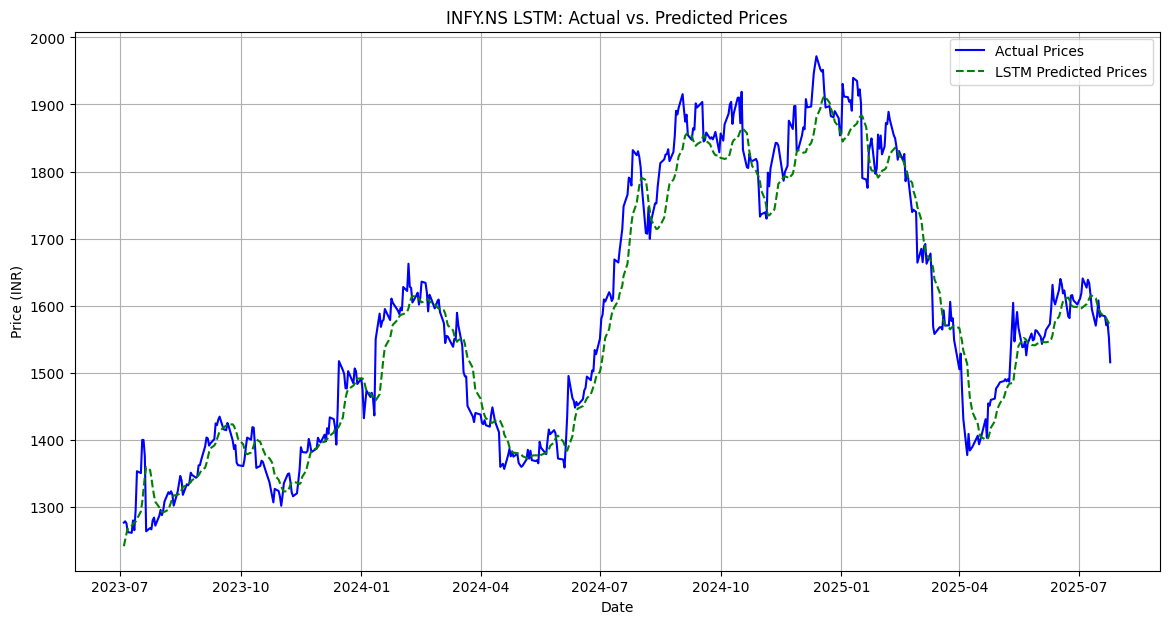

In [10]:
#  Model Evaluation (LSTM)
print(" Model Evaluation (LSTM)")

# Predict using test data
lstm_predictions_scaled = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

# Inverse transform the actual test values
y_test_lstm_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate LSTM model performance metrics
lstm_mse = mean_squared_error(y_test_lstm_actual, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_lstm_actual, lstm_predictions)
lstm_r2 = r2_score(y_test_lstm_actual, lstm_predictions)

print(f"LSTM Metrics:")
print(f"  Mean Squared Error (MSE): {lstm_mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {lstm_rmse:.2f}")
print(f"  Mean Absolute Error (MAE): {lstm_mae:.2f}")
print(f"  R-squared (R²): {lstm_r2:.2f}\n")

# Visualize actual vs. predicted prices from LSTM
test_dates_lstm = df.iloc[len(df) - len(y_test_lstm_actual):].index

plt.figure(figsize=(14, 7))
plt.plot(test_dates_lstm, y_test_lstm_actual, label='Actual Prices', color='blue')
plt.plot(test_dates_lstm, lstm_predictions, label='LSTM Predicted Prices', color='green', linestyle='--')
plt.title(f'{STOCK_TICKER} LSTM: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()
print("\n")

Future Price Prediction (LSTM - Example)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━

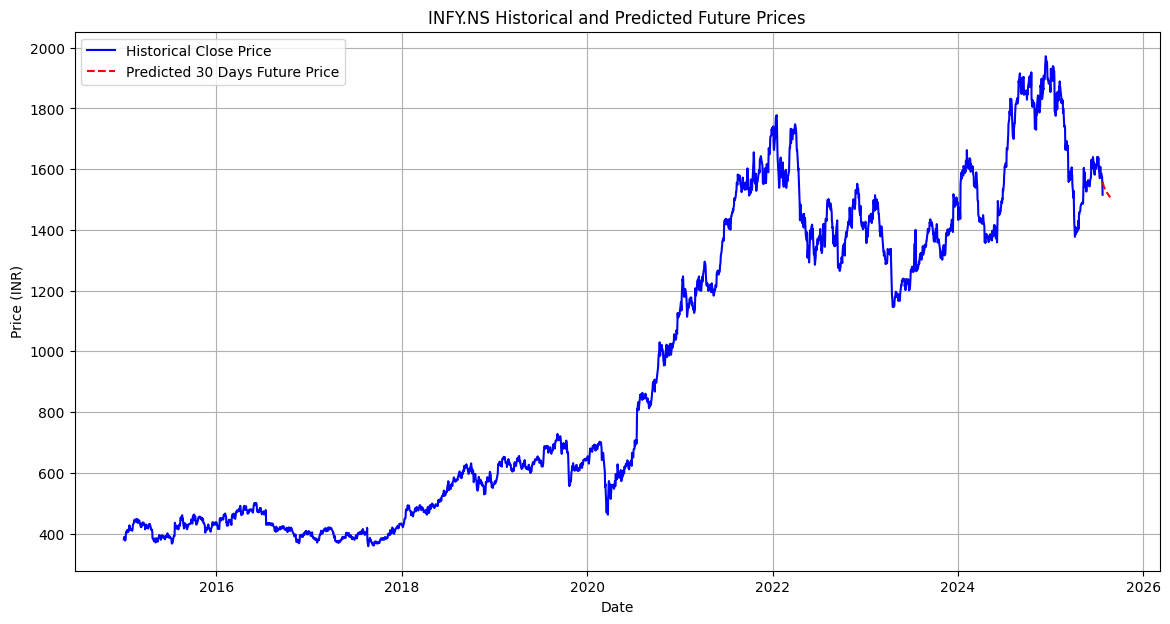


Predicted 30 days future prices for INFY.NS:
            Predicted_Close
2025-07-26      1557.914429
2025-07-27      1551.963501
2025-07-28      1547.961914
2025-07-29      1544.980225
2025-07-30      1542.552124
...
            Predicted_Close
2025-08-20      1511.742920
2025-08-21      1510.568359
2025-08-22      1509.412231
2025-08-23      1508.273560
2025-08-24      1507.152832


In [11]:
# Future Price Prediction (LSTM - Example)
print("Future Price Prediction (LSTM - Example)")

# Use last 60 days from original scaled data as input for future prediction
last_PREDICTION_DAYS = scaled_data[-PREDICTION_DAYS:].reshape(1, PREDICTION_DAYS, 1)
future_predictions_scaled = []
current_input = last_PREDICTION_DAYS

for i in range(FUTURE_PRED_DAYS):
    next_day_pred = lstm_model.predict(current_input)[0, 0]
    future_predictions_scaled.append(next_day_pred)
    current_input = np.append(current_input[:, 1:, :], [[[next_day_pred]]], axis=1)

# Convert scaled predictions back to original INR scale
future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

# Generate future date range for plotting
last_date = df.index[-1]
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, FUTURE_PRED_DAYS + 1)]

# Plot historical vs. predicted future closing prices
plot_df = df[['Close']].copy()
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted_Close'])

plt.figure(figsize=(14, 7))
plt.plot(plot_df.index, plot_df['Close'], label='Historical Close Price', color='blue')
plt.plot(future_df.index, future_df['Predicted_Close'], label=f'Predicted {FUTURE_PRED_DAYS} Days Future Price', color='red', linestyle='--')
plt.title(f'{STOCK_TICKER} Historical and Predicted Future Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Print future price predictions
print(f"\nPredicted {FUTURE_PRED_DAYS} days future prices for {STOCK_TICKER}:")
print(future_df.head())
print("...")
print(future_df.tail())